# Tentativa previsão de vendas, Desafio data analitycs

In [64]:
import pandas as pd
tabela = pd.read_excel('Dados.xlsx', index_col='Data', parse_dates=True)

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317
2022-12-11,685
2022-12-12,1366
2022-12-13,1213
2022-12-14,1055


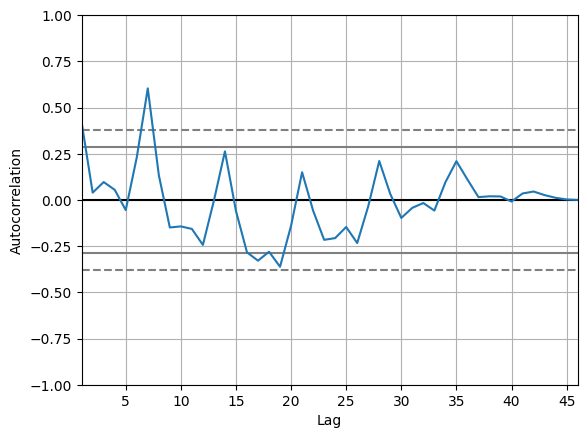

In [4]:
display(tabela)
autocorrelation_plot(tabela)
plt.show()

In [5]:
import pandas.util.testing as ta
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

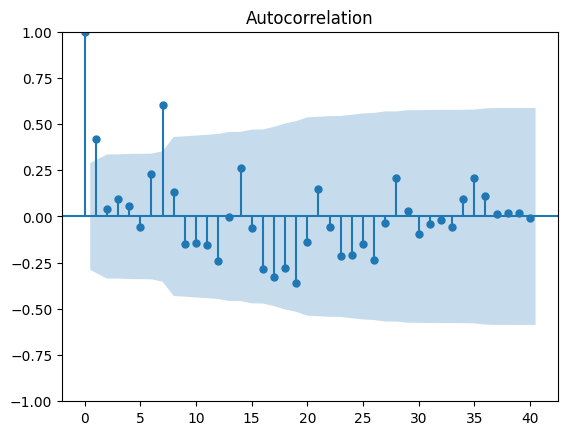

In [6]:
plot_acf(tabela, lags=40)
plt.show()

In [7]:
import statsmodels.api as sm
from matplotlib import pyplot

In [75]:
model = sm.tsa.arima.ARIMA(tabela, order=(7,1,1))
model_fit = model.fit()

In [9]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Vendas   No. Observations:                   46
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -330.807
Date:                Fri, 03 Feb 2023   AIC                            671.614
Time:                        21:00:47   BIC                            680.647
Sample:                    12-06-2022   HQIC                           674.981
                         - 01-20-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4662      0.248     -1.881      0.060      -0.952       0.020
ar.L2          0.0529      0.257      0.206      0.837      -0.450       0.556
ma.L1          0.1037      0.143      0.725      0.4

In [76]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

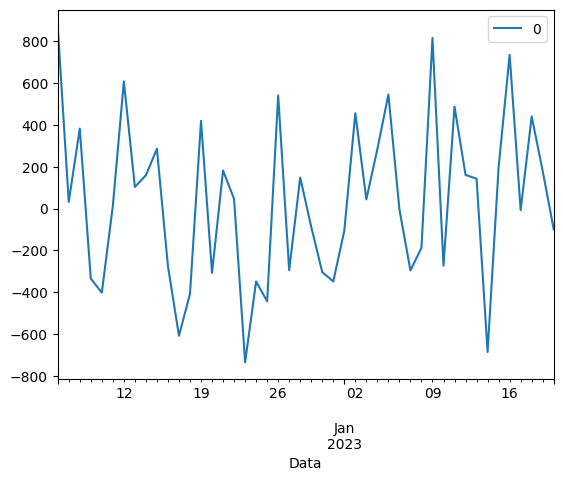

In [67]:
residuals.plot()
plt.show()

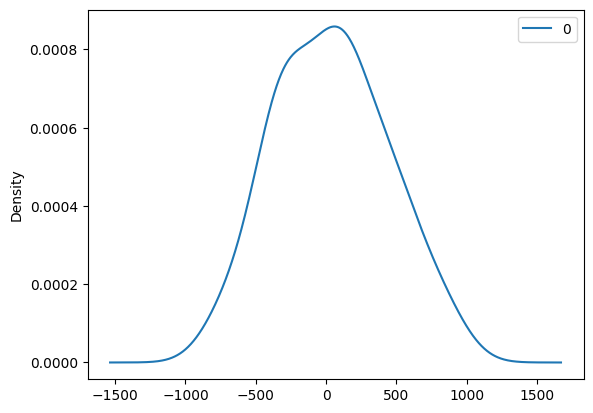

In [12]:
residuals.plot(kind='kde')
plt.show()

In [13]:
print(residuals.describe())

                0
count   46.000000
mean    37.226813
std    394.859357
min   -734.419754
25%   -295.701847
50%     37.770369
75%    284.698535
max    870.000000


In [77]:
x= tabela.values
x = x.astype('float32')

In [85]:
size = int(len(x) *0.5)

In [86]:
train = x[0:size]
test = x[size:]

In [87]:
history = [x for x in train]

In [88]:
predictions = list()

In [89]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] = dataset[i - interval]
        diff.append(value)
    return diff

def inverse_difference(history, previsao, interval=1):
    return previsao + history[-interval]

In [83]:
from statsmodels.tsa.arima_model import ARIMA   

In [90]:
for t in range(len(test)):
    dia = 0
    diff = difference(history, dia)
    
    model = sm.tsa.arima.ARIMA(diff, order=(7,1,1))
    
    model_fit = model.fit()
    
    valor_predito = model_fit.forecast()[0]
    
    valor_predito = inverse_difference(history, valor_predito, dia)
    
    predictions.append(valor_predito)
    
    valor_real = test[t]
    
    history.append(valor_real)
    
    print('valor predito ', valor_predito, ' valor esperado ', valor_real)
    
    
    
    

valor predito  [1634.4567]  valor esperado  [638.]
valor predito  [655.0437]  valor esperado  [106.]
valor predito  [900.10455]  valor esperado  [54.]
valor predito  [1044.9612]  valor esperado  [144.]
valor predito  [1606.0043]  valor esperado  [814.]
valor predito  [1474.7463]  valor esperado  [679.]
valor predito  [1324.3499]  valor esperado  [712.]
valor predito  [1650.8091]  valor esperado  [1229.]
valor predito  [1476.6659]  valor esperado  [821.]
valor predito  [1500.1306]  valor esperado  [319.]
valor predito  [1311.7363]  valor esperado  [317.]
valor predito  [1724.176]  valor esperado  [1317.]
valor predito  [1965.7279]  valor esperado  [807.]
valor predito  [1663.8624]  valor esperado  [923.]
valor predito  [2228.7588]  valor esperado  [1265.]
valor predito  [1827.4075]  valor esperado  [892.]
valor predito  [1262.4016]  valor esperado  [289.]
valor predito  [1250.0175]  valor esperado  [566.]
valor predito  [2203.6538]  valor esperado  [1692.]
valor predito  [1985.292]  val

In [91]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,predictions))
print('test rmse', rmse)

test rmse 840.14777


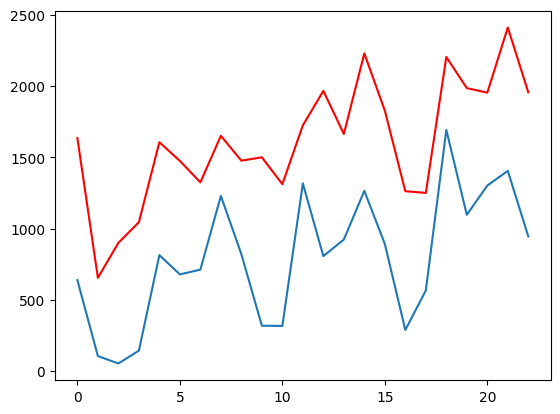

In [92]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [93]:
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [94]:
residuals = pd.DataFrame(residuals)

In [95]:
residuals.head()

,0
0,-996.456665
1,-549.043701
2,-846.104553
3,-900.961182
4,-792.004272


In [96]:
residuals.describe()

,0
count,23.000000
mean,-812.050110
std,220.302139
min,-1181.130615
25%,-984.068970
50%,-846.104553
75%,-653.587280
max,-407.176025


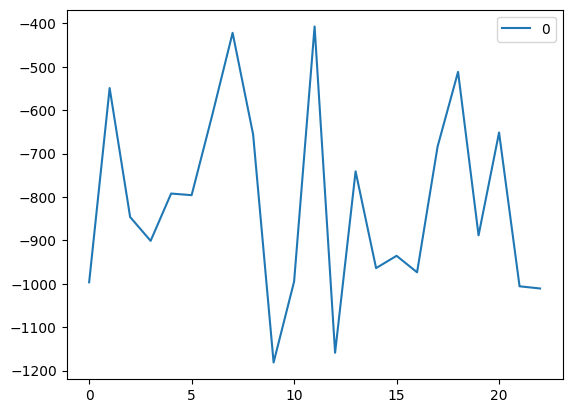

In [97]:
residuals.plot()
plt.show()

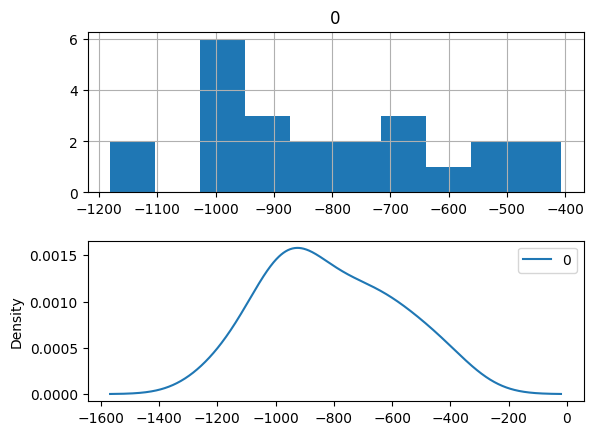

In [98]:
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())

plt.subplot(212)
residuals.plot(kind="kde", ax=plt.gca())
plt.show()

In [99]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 14 must be < 11.

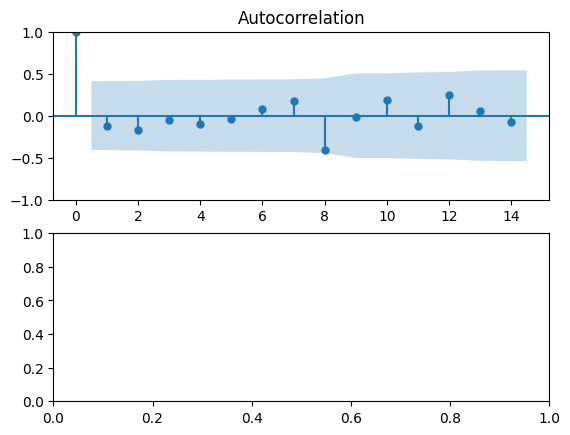

In [106]:
plt.figure()
plt.subplot(211)
plot_acf(residuals, ax=plt.gca())
plt.subplot(212)
plot_pacf(residuals, ax=plt.gca())
plt.show()